## Библиотеки и методология парсинга веб-страниц

Обсуждая NLTK, мы подчеркнули важность корпуса или большого хранилища текстов для исследований в NLP. Хотя имеющиеся корпуса весьма полезны, исследователям NLP может потребоваться текст по конкретному предмету. Например, кто-то, пытающийся создать анализатор настроений для финансовых рынков, может не найти особенно полезного доступного корпуса (выступлений президента, обзоров фильмов и т. д.). Следовательно, исследователям NLP, возможно, придётся получать данные из других источников. Веб-скрапинг — чрезвычайно полезный инструмент в этом отношении, поскольку он позволяет пользователям программно извлекать информацию из веб-источников.

Прежде чем мы начнем обсуждать веб-скрапинг, надо подчеркнуть важность соблюдения соответствующих политик веб-сайта в отношении веб-скрапинга. Большинство веб-сайтов разрешают парсинг веб-страниц для индивидуального некоммерческого использования, но вы всегда должны уточнять политику перед парсингом веб-сайта.

Для выполнения парсинга веб-страниц мы будем использовать тестовый [веб-сайт](https://webscraper.io/test-sites/e-commerce/allinone) для реализации нашего скрипта парсинга веб-страниц. Тестовый веб-сайт — это сайт вымышленной компании электронной коммерции, которая продает компьютеры и телефоны.

Вот скриншот сайта:

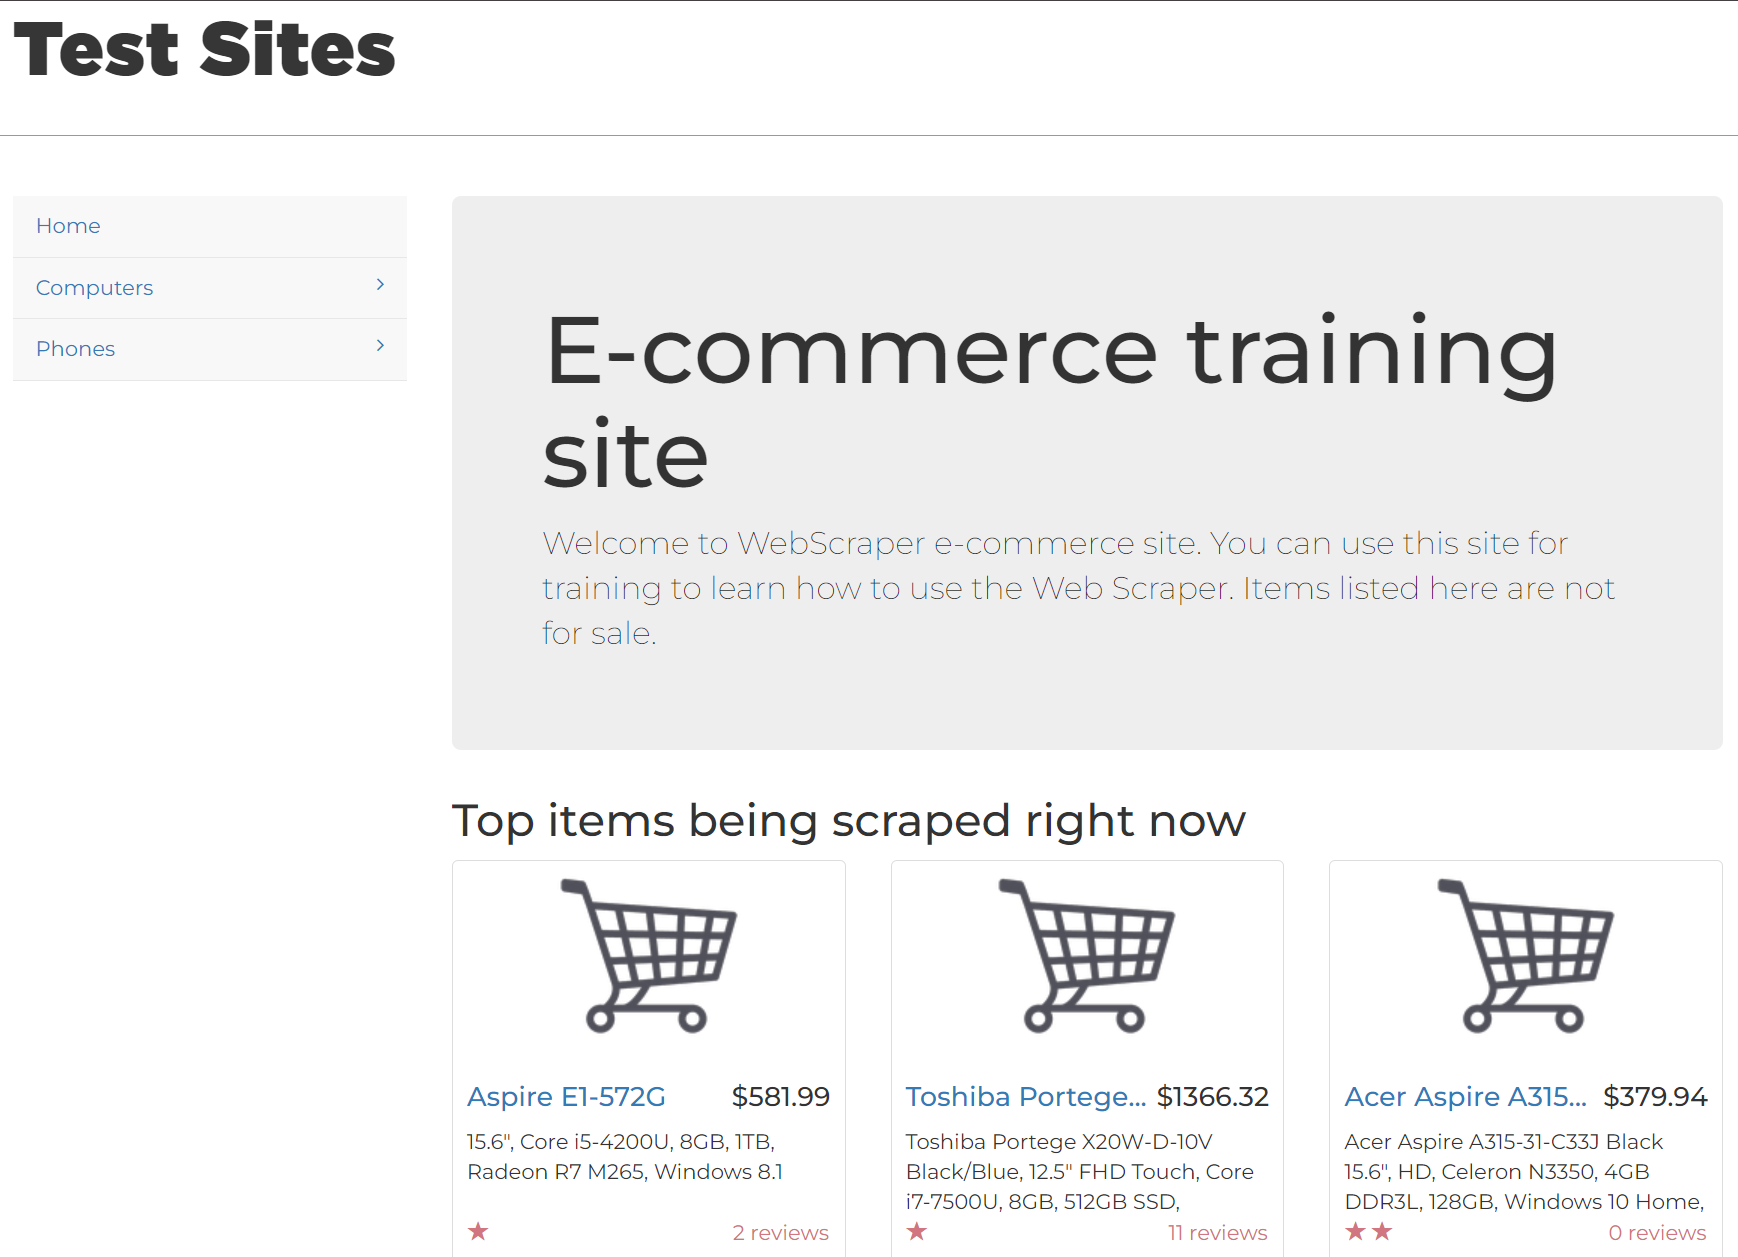

На веб-сайте перечислены продукты, которые он продает, и каждый продукт имеет информацию о цене и рейтинге пользователей. Допустим, мы хотим извлечь цену и рейтинг пользователей каждого ноутбука, указанного на веб-сайте. Вы можете выполнить эту задачу вручную, но это будет очень трудоемко и неэффективно. Веб-скрапинг помогает нам выполнять подобные задачи гораздо эффективнее и элегантнее.

Теперь рассмотрим, как можно выполнить предыдущую задачу с помощью инструментов веб-скрейпинга в Python. Во-первых, нам нужно установить библиотеки Requests и BeautifulSoup, которые являются наиболее часто используемыми библиотеками Python для парсинга веб-страниц. Доступ к документации для Requests можно получить по адресу https://requests.readthedocs.io/en/master/, а к документации по BeatifulSoup— по адресу https://www.crummy.com/software/BeautifulSoup/.

In [6]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


После установки мы импортируем библиотеки Requests и BeautifulSoup. Библиотека pandas будет использоваться для хранения всех извлеченных данных и их экспорта в файл CSV:

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Когда мы вводим URL-адрес в наш веб-браузер и нажимаем Enter , запускается ряд событий до того, как веб-страница будет отображена в нашем браузере. Эти события включают в себя поиск нашим браузером IP-адреса веб-сайта, отправку нашим браузером HTTP-запроса на сервер, на котором размещен веб-сайт, и ответ сервера отправкой другого HTTP-ответа. Если все согласовано, происходит соединение между сервером и вашим браузером, и данные передаются. Библиотека запросов помогает нам выполнять все эти шаги с помощью скриптов Python.

Следующий фрагмент кода показывает, как мы можем программно подключиться к веб-сайту с помощью библиотеки Requests:

In [9]:
url = 'https://webscraper.io/test-sites/e-commerce/allinone/computers/laptops'
request = requests.get(url)

Выполнение предыдущих команд устанавливает соединение с данным веб-сайтом и считывает HTML-код страницы. Все, что мы видим на веб-сайте (текст, изображения, макеты, ссылки на другие веб-страницы и т. д.), можно найти в HTML-коде страницы. Используя функцию request.text, мы можем вывести весь HTML-скрипт веб-страницы, как показано ниже:

In [15]:
request.text

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n\t\t\t<!-- Anti-flicker snippet (recommended)  -->\n<style>.async-hide {\n\t\topacity: 0 !important\n\t} </style>\n<script>(function (a, s, y, n, c, h, i, d, e) {\n\t\ts.className += \' \' + y;\n\t\th.start = 1 * new Date;\n\t\th.end = i = function () {\n\t\t\ts.className = s.className.replace(RegExp(\' ?\' + y), \'\')\n\t\t};\n\t\t(a[n] = a[n] || []).hide = h;\n\t\tsetTimeout(function () {\n\t\t\ti();\n\t\t\th.end = null\n\t\t}, c);\n\t\th.timeout = c;\n\t})(window, document.documentElement, \'async-hide\', \'dataLayer\', 4000,\n\t\t{\'GTM-NVFPDWB\': true});</script>\n\t\n\t<!-- Google Tag Manager -->\n<script>(function (w, d, s, l, i) {\n\t\tw[l] = w[l] || [];\n\t\tw[l].push({\n\t\t\t\'gtm.start\':\n\t\t\t\tnew Date().getTime(), event: \'gtm.js\'\n\t\t});\n\t\tvar f = d.getElementsByTagName(s)[0],\n\t\t\tj = d.createElement(s), dl = l != \'dataLayer\' ? \'&l=\' + l : \'\';\n\t\tj.async = true;\n\t\tj.src =\n\t\t\t\'https://www.googletagma

Если вы хотите увидеть HTML-код страницы в браузере, просто щелкните правой кнопкой мыши в любом месте страницы и выберите «Проверить», как показано ниже:

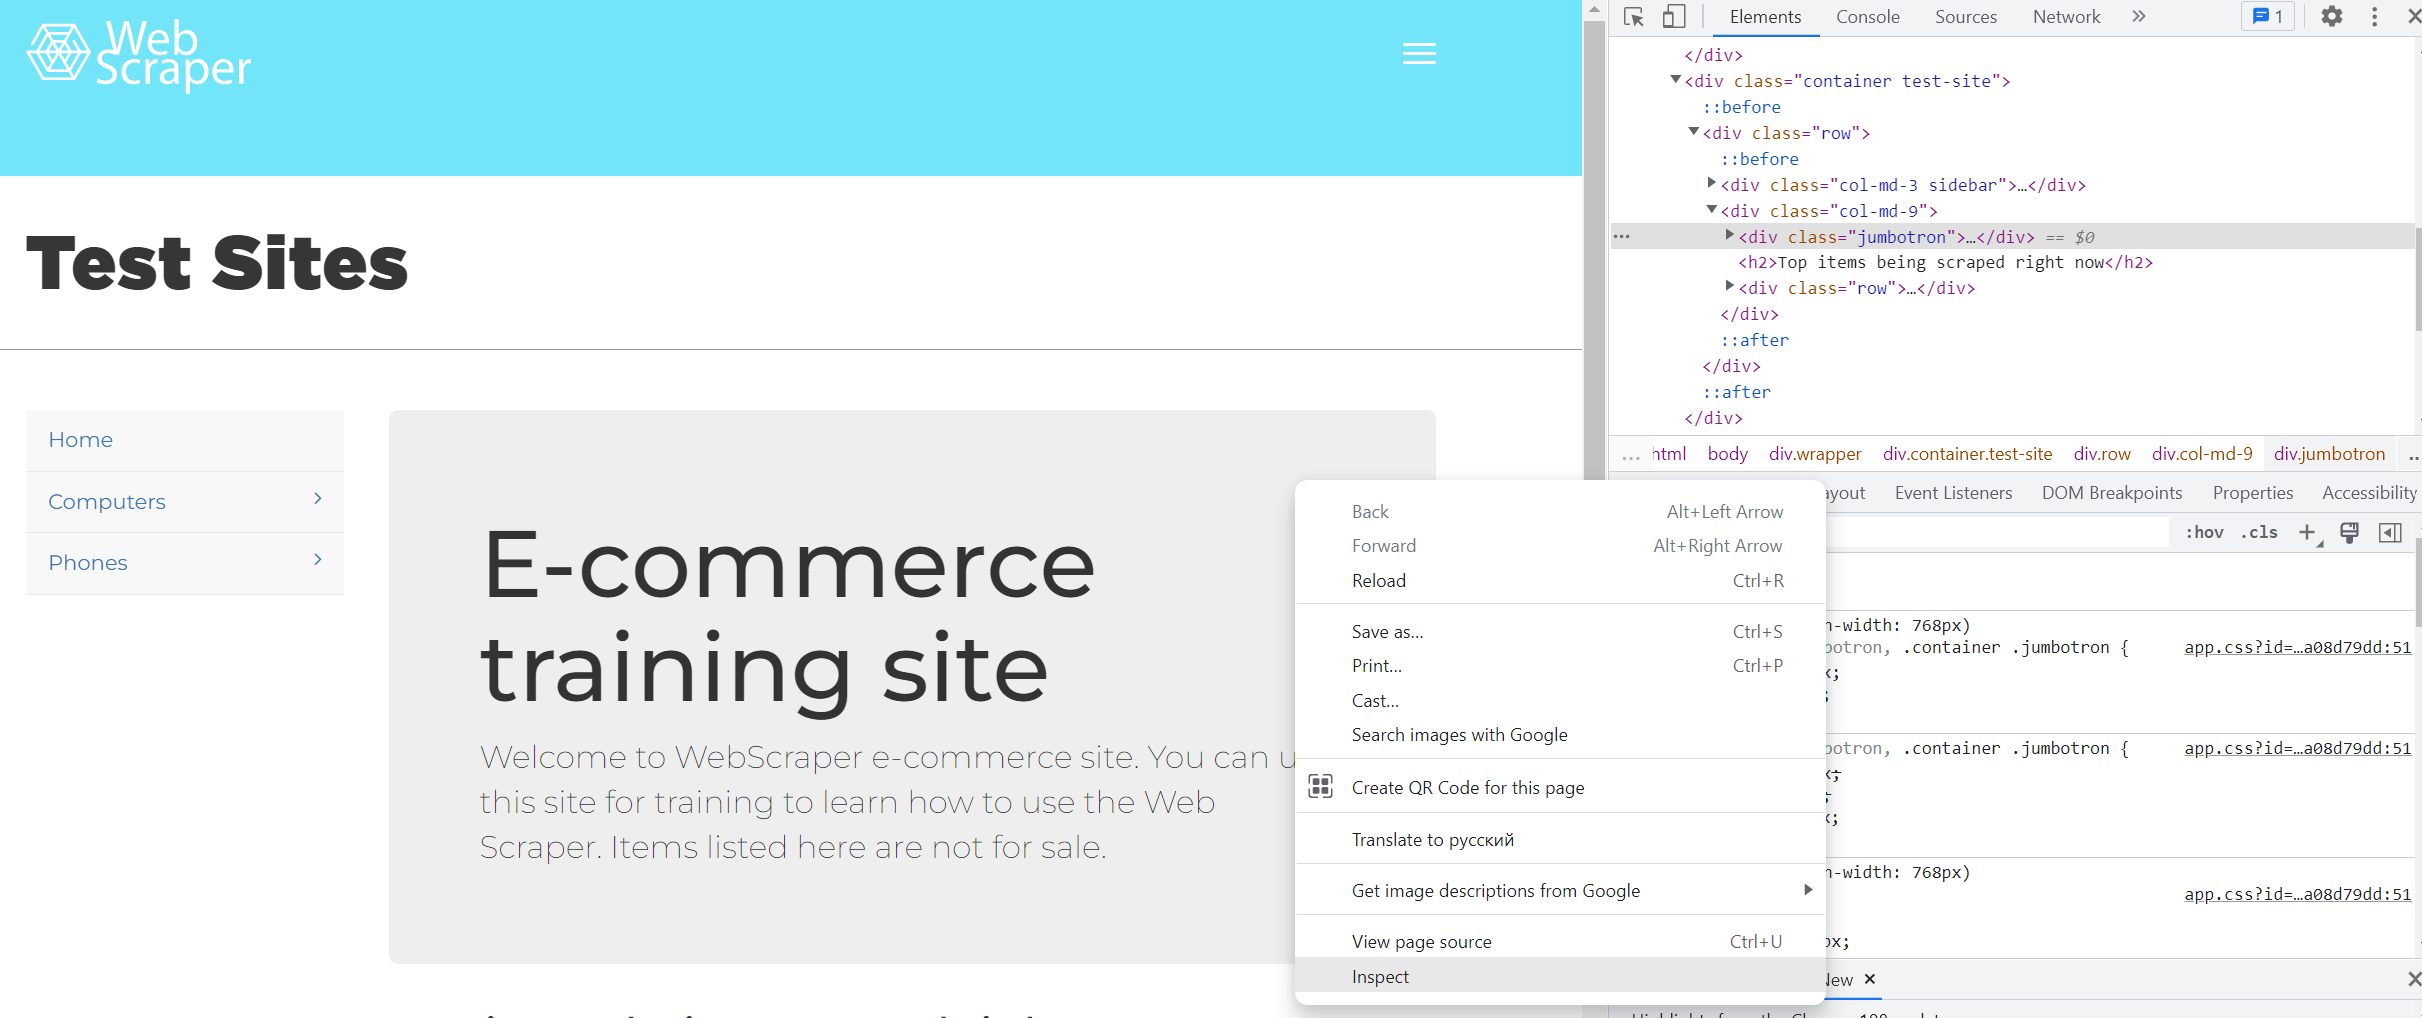

Откроется панель, содержащая HTML-код страницы. Если вы наведете указатель мыши на любую часть HTML-кода, соответствующий раздел на веб-странице будет выделен. Это говорит нам о том, что код для выделенной части кода веб-страницы можно найти, расширив этот раздел HTML-кода:

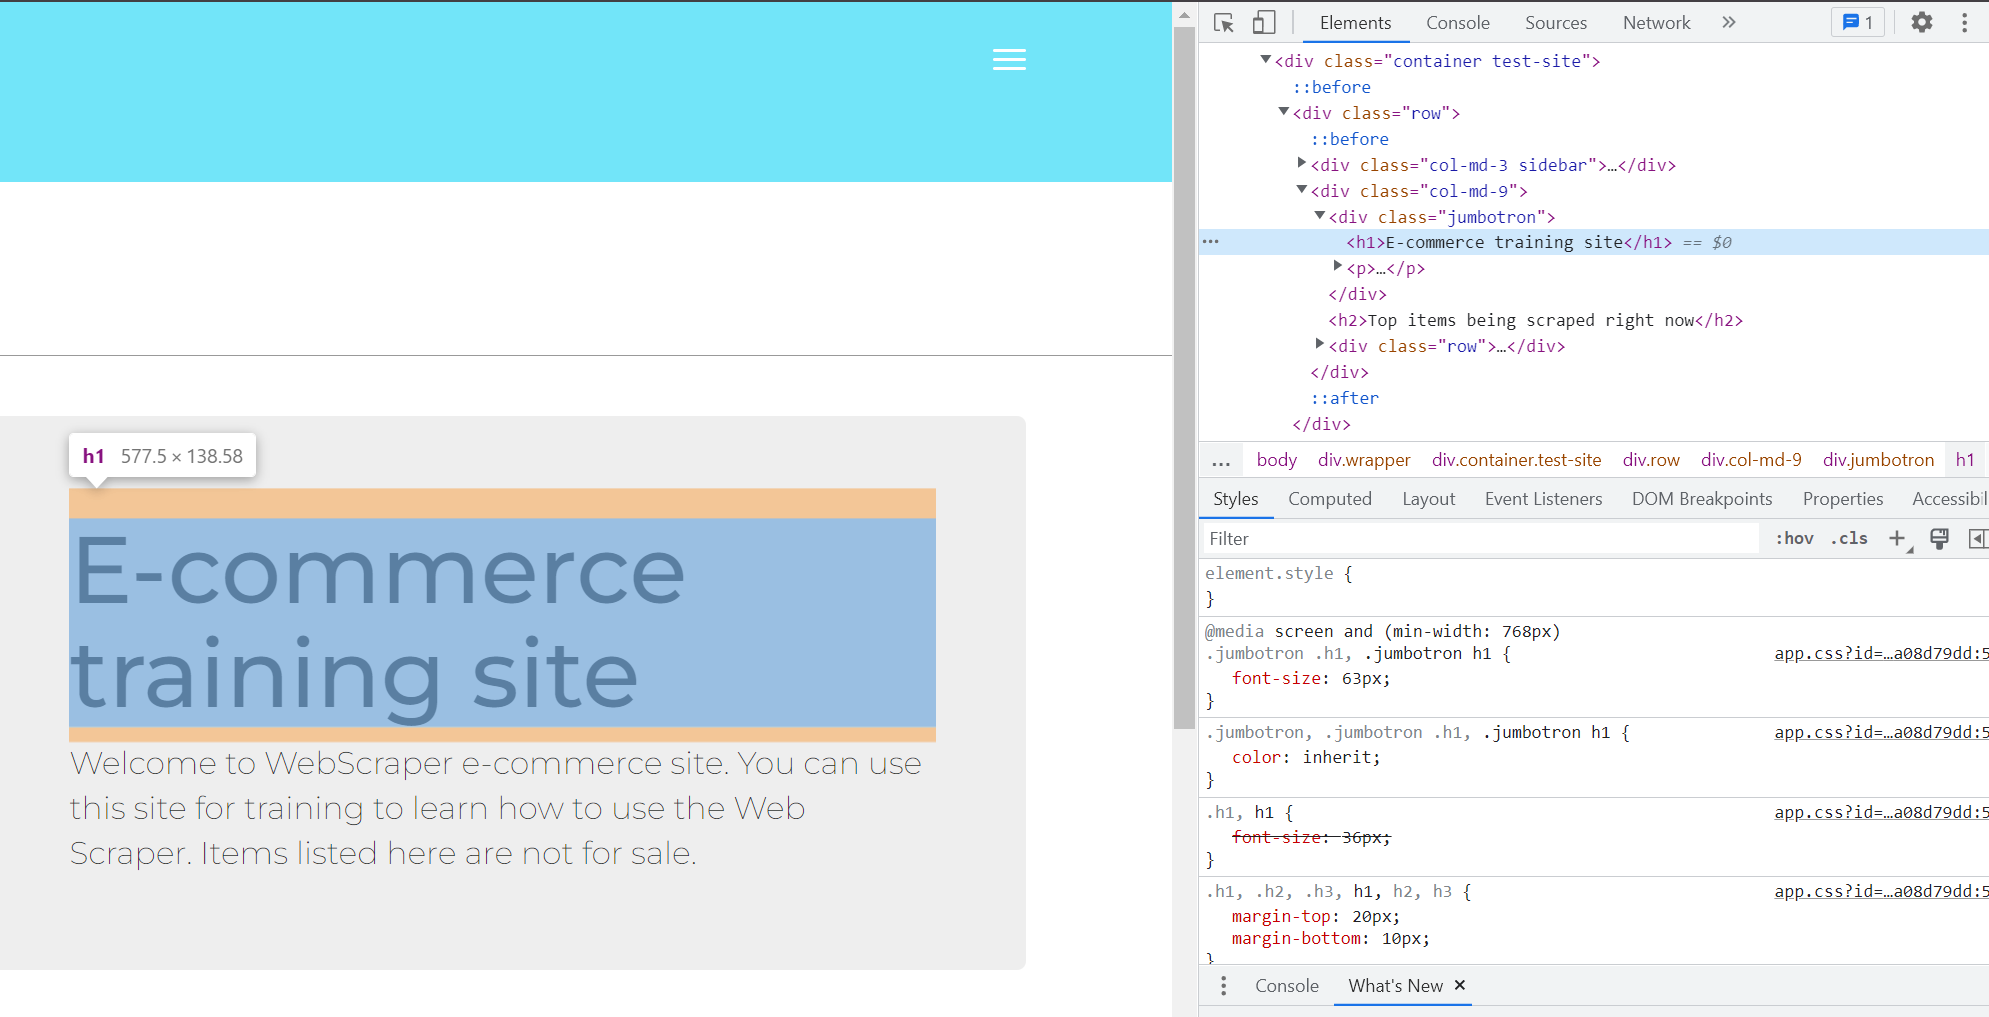

Код HTML обычно делится на разделы, при этом типичная страница имеет раздел заголовка и раздел тела. Раздел body далее делится на элементы, каждый из которых имеет атрибуты, представленные определенным тегом. На предыдущем снимке экрана мы видим различные элементы, классы и теги HTML-кода. Нам нужно будет пройтись по этому сложно выглядящему коду и извлечь соответствующую информацию (в нашем случае название продукта, цену и рейтинг). Эту, казалось бы, сложную задачу можно довольно удобно выполнить с помощью любой из доступных библиотек веб-скрейпинга. Beautiful Soup — один из самых популярных парсеров, поэтому мы посмотрим, как он может помочь нам разобрать пугающий текст HTML-кода. Настоятельно рекомендуется посетить страницу документации Beautiful Soup (https://www.crummy.com/software/BeautifulSoup/bs4/doc/ ) и лучше понять эту увлекательную библиотеку.

Мы используем модуль BeautifulSoup и передаем ему HTML-код (request.text) и параметр с именем HTML Parser, который создает объект парсера HTML BeautifulSoup.  
Теперь мы можем применять к этому объекту множество универсальных функций и извлекать искомую информацию. Но прежде, чем мы начнем это делать, нам нужно ознакомиться с веб-страницей, которую мы пытаемся считать и определить, где на веб-странице можно найти интересующие нас элементы.  
В HTML-коде веб-сайта электронной коммерции мы видим, что детали каждого продукта закодированы в теге "div" (div относится к разделу в HTML) с классом col-sm-4 col-lg-4 col-md-4. Если вы расширите "div", нажав на стрелку, вы увидите, что внутри тега "div" есть другие теги и элементы, которые хранят различную информацию.

Для начала нас интересует получение списка наименований товаров. Чтобы узнать, где в HTML-коде включены названия продуктов, нам нужно будет навести курсор на любое из названий продуктов, щелкнуть правой кнопкой мыши и затем нажать «Проверить».

Откроется панель, содержащая HTML-код веб-страницы, как показано на следующем снимке экрана:

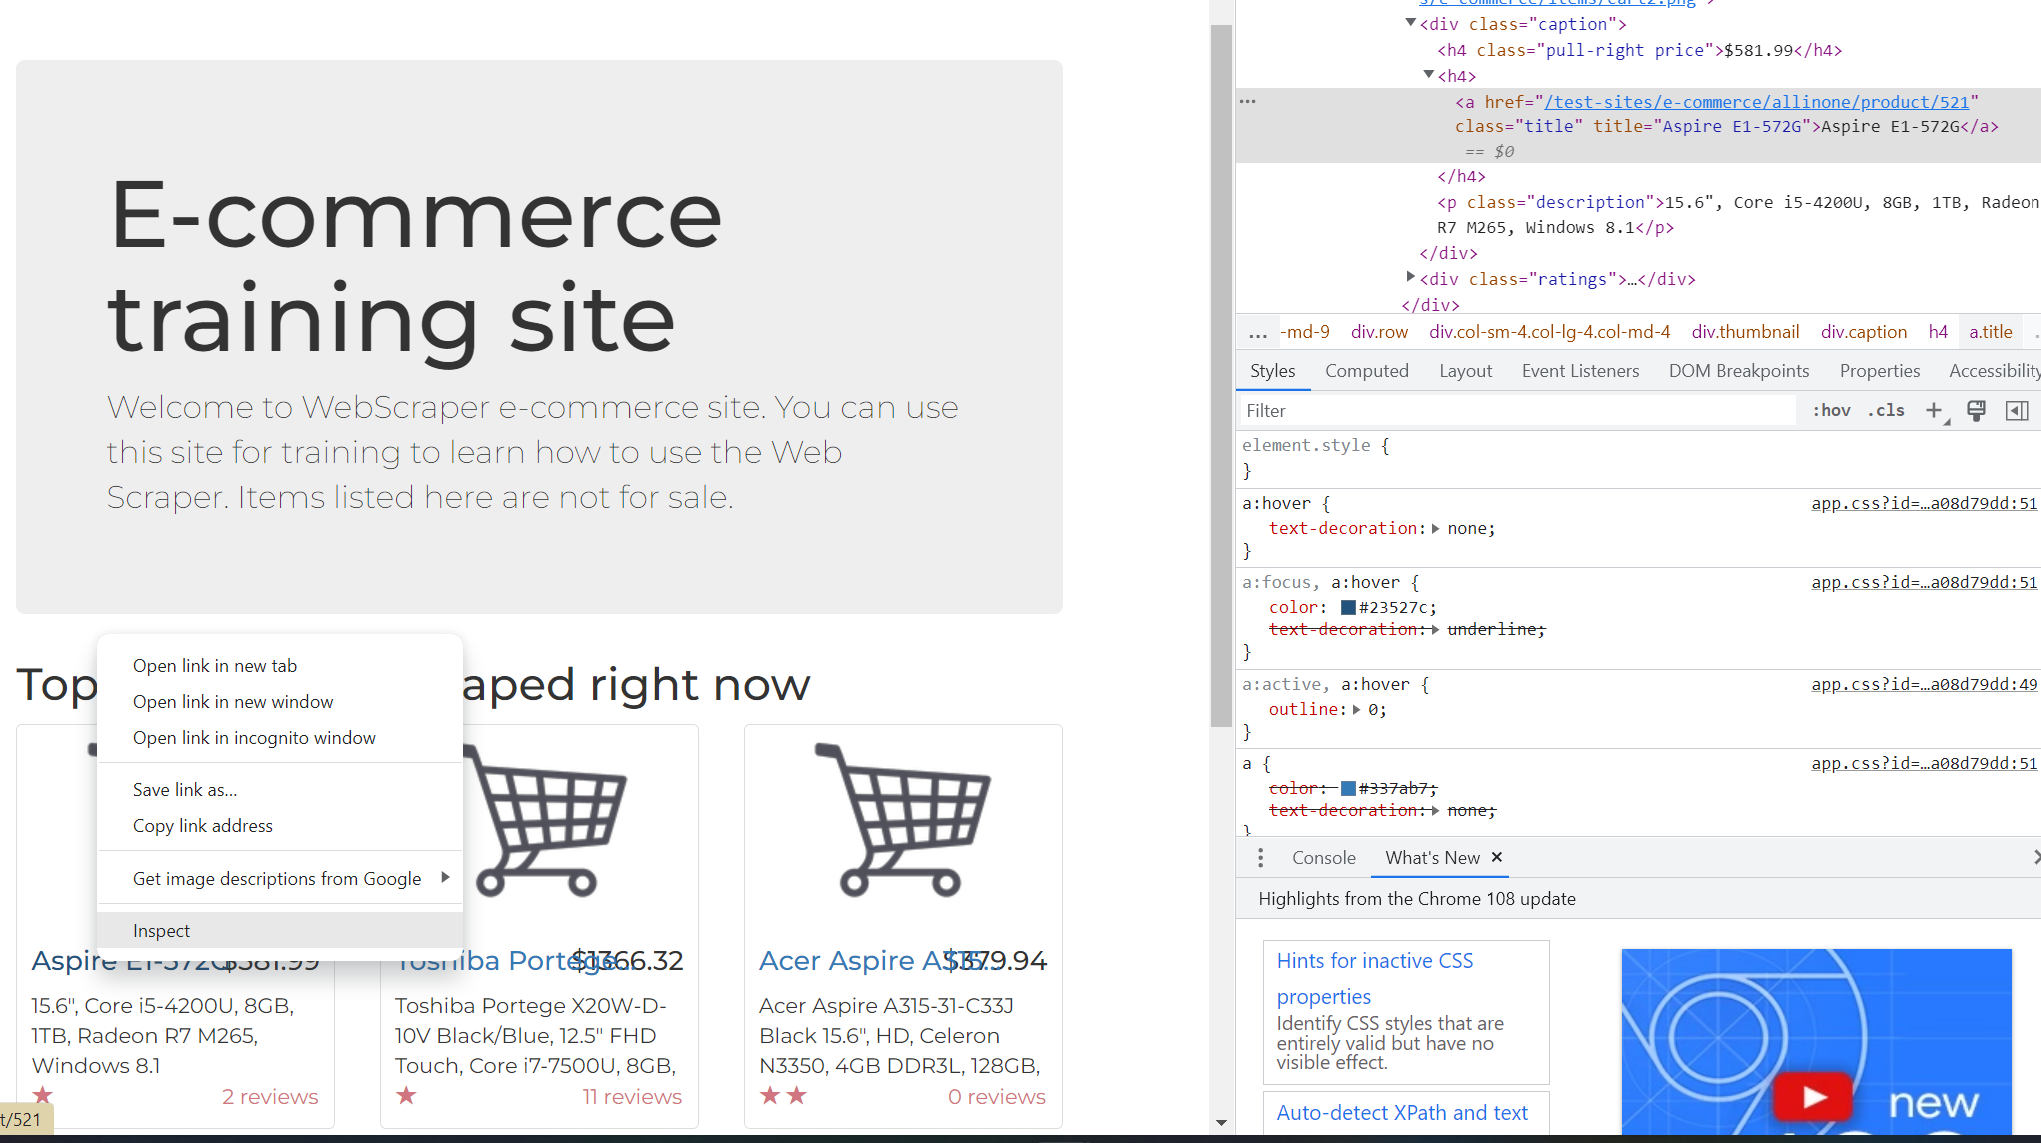

Как видим, название товара можно извлечь из элемента title тега "a", находящегося в подразделе кода caption. Точно так же мы можем найти информацию о ценах в том же подразделе caption, но в классе pull-right price. Наконец, информацию о рейтинге можно извлечь из этого подраздела с помощью класса rating:

In [11]:
# <a href="/test-sites/e-commerce/allinone/product/521" class="title" title="Aspire E1-572G">Aspire E1-572G</a>

Теперь мы можем приступить к формулированию нашей стратегии парсинга веб-страниц, которая будет включать в себя повторение всех разделов кода с классом col-sm-4 col-lg-4 col-md-4, а затем извлечение соответствующей информации на каждой итерации. Мы будем использовать функцию Beautiful Soup find_all() для определения всех тегов "<div>" класса col-sm-4 col-lg-4 col-md-4. Эта функция создает итерируемый объект, и мы используем цикл for для поиска каждого подразделения. Мы можем извлечь текст из объекта BeautifulSoup с помощью функции .text и можем извлечь имя элемента с помощью функции .get().

In [12]:
titles = []
prices = []
ratings = []
url = 'https://webscraper.io/test-sites/e-commerce/allinone/computers/laptops'
request = requests.get(url)
soup = BeautifulSoup(request.text, "html.parser")
for product in soup.find_all('div', {'class': 'col-sm-4 col-lg-4 col-md-4'}):
    for pr in product.find_all('div', {'class': 'caption'}):
        for p in pr.find_all('h4', {'class': 'pull-right price'}):
            prices.append(p.text)
        for title in pr.find_all('a' , {'title'}):
            titles.append(title.get('title'))
    for rt in product.find_all('div', {'class': 'ratings'}):
        ratings.append(len(rt.find_all('span', \
                      {'class': 'glyphicon glyphicon-star'})))

В качестве последнего шага мы передаем извлеченную информацию во фрейм данных и экспортируем окончательный результат в файл CSV:

In [14]:
product_df = pd.DataFrame(zip(titles,prices,ratings), columns = \
                            ['Titles','Prices', 'Ratings'])

product_df.to_csv("ecommerce.csv", index = False)

Ниже приведен частичный скриншот созданного файла:

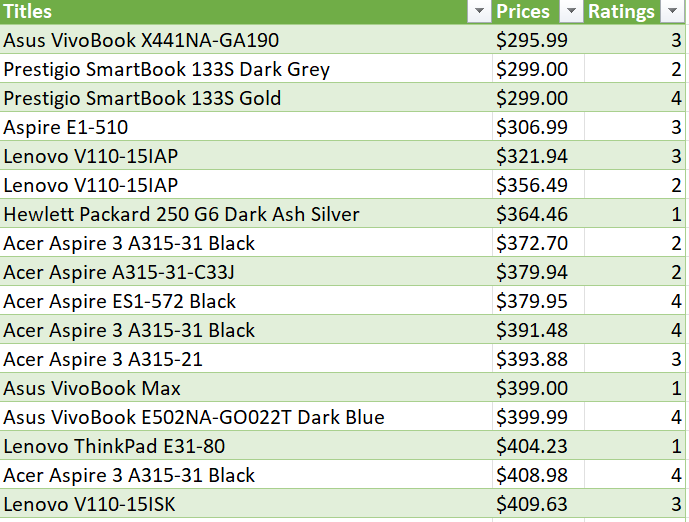

Предыдущие шаги демонстрируют, как мы можем программно извлекать соответствующую информацию из веб-источников, используя веб-скрапинг, с относительной легкостью, используя библиотеки Python. Чем сложнее структура веб-страницы, тем сложнее её парсить. Веб-сайты также постоянно меняют структуру и формат своих веб-страниц, что означает необходимость внесения крупномасштабных изменений в базовый HTML-код. Любое изменение в HTML-коде страницы требует проверки кода скрапера. Вам предлагается попрактиковаться в парсинге других веб-сайтов и лучше понять структуру HTML-кода.

Следует повторить, что крайне важно, чтобы вы соблюдали любые ограничения на парсинг или просмотр веб-страниц, установленные кокретным веб-сайтом.